### 5 main steps that are involved in training ML algorithm
1. Selection of features
2. Choosing a performance metric
3. Choosing a classifier and optimization algorithm
4. Evaluating the performance of the model
5. Tuning the algorithm

### Training a perceptron via Scikit-learn

In [1]:
from sklearn import datasets
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
iris = datasets.load_iris()

In [5]:
print iris

{'target_names': array(['setosa', 'versicolor', 'virginica'], 
      dtype='|S10'), 'data': array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.

In [6]:
X = iris.data[:, [2,3]]
y = iris.target

In [7]:
# Return the different class labels stored in iris.target
np.unique(y)

array([0, 1, 2])

#### Split the dataset into separate training and test datasets

In [8]:
from sklearn.cross_validation import train_test_split

In [9]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Feature Scaling using standardization

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

- Using the preceding code, we loaded the **StandardScaler class** from the preprocessing module and initialized a new StandardScaler object that we assigned to the variable sc. Using the **fit method**, **StandardScaler** estimated the parameters **μ (sample mean) and  sigma (standard deviation)** for each feature dimension from the training data.

- By calling the transform method, we then standardized the training data using those estimated parameters μ and sigma . 

- Note that we used the same scaling parameters to standardize the test set so that both the values in the training and test dataset are comparable to each other.

#### Train a perceptron model

In [12]:
from sklearn.linear_model import Perceptron

In [13]:
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

#### Make Predictions via the predict method

In [14]:
y_pred = ppn.predict(X_test_std)

In [15]:
print 'Misclassified samples: %d' %(y_test != y_pred).sum()

Misclassified samples: 4


In [16]:
from sklearn.metrics import accuracy_score

In [17]:
print 'Accuracy: %.2f' % accuracy_score(y_test, y_pred)

Accuracy: 0.91


In [21]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, test_idx= None,  resolution=0.02):
    # Setup marker generator and color map
    markers = ('s', 'x', 'o','^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'green', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution ))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y =X[y == cl, 1],
                   alpha=0.8, c=cmap(idx),
                   marker=markers[idx], label=cl)
        
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', alpha=1.0, linewidth=1,
                   marker='o', s=55, label='test set')

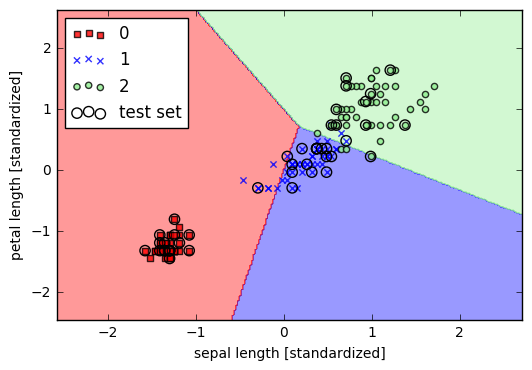

In [22]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, \
                      test_idx = range(105, 150))
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()

### Logistic Regression

### Training a logistic regression model with Scikit-learn

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

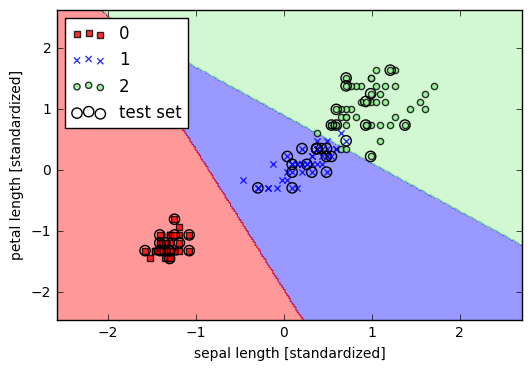

In [25]:
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=lr, \
                      test_idx = range(105, 150))
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()

In [38]:
# Predict the class-membership probability of the samples via the predict_proba
lr.predict_proba(X_test_std[0,:].reshape(1,-1))

array([[  2.05743774e-11,   6.31620264e-02,   9.36837974e-01]])

In [39]:
from sklearn.svm import SVC

In [40]:
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

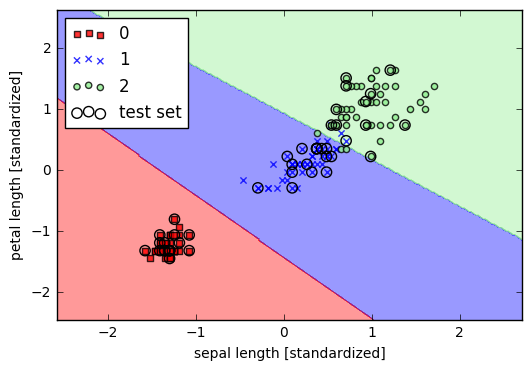

In [41]:
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=svm, \
                      test_idx = range(105, 150))
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()

## Support Vector Machines
### Logistic Regression versus SVM
In practical classification tasks,
- Linear logistic regression and linear SVMs often yield very similar results.
- Logistic Regression tries to maximize the likelihoods of the training data, which makes it more prone to outliers than SVMs
- The SVMs mostly care about the points that are closest to the decision boundary(support vectors)
- Logistic Regression has the advantage that it is a simpler model that can be implemented more easily.
- Logistic Regression models can be easily updated, which is attractive when working with streaming data.


### Solving nonlinear problems using a kernel SVM
- Another reason why SVMs enjoy high popularity among ML practitioners is that they can be easily **kernelized** to solve nonlinear classification problems.



In [46]:
# Simple dataset that has the form of an XOR gate using the logical_xor
np.random.seed()
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:,1] > 0)
y_xor = np.where(y_xor, 1, -1)
y_xor

array([-1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1, -1,  1, -1,  1,  1,
        1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1,
       -1, -1,  1, -1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,
       -1, -1, -1,  1,  1, -1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1,
       -1, -1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  1, -1,
        1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1,
       -1,  1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1, -1,  1, -1,  1, -1,
       -1,  1, -1,  1, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1, -1,  1,
        1, -1,  1, -1,  1, -1, -1,  1,  1, -1,  1, -1, -1,  1,  1, -1, -1,
        1,  1, -1, -1,  1,  1, -1, -1,  1,  1, -1,  1,  1, -1, -1, -1, -1,
       -1,  1, -1, -1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,
       -1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1])

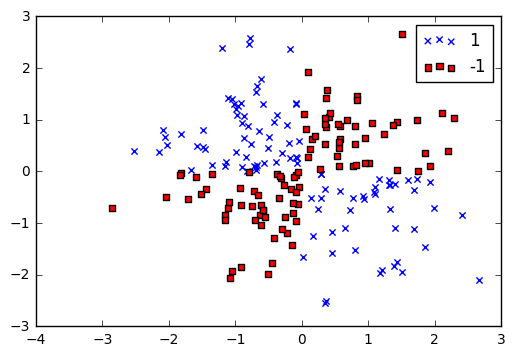

In [47]:
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1],
           c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==-1, 0], X_xor[y_xor==-1, 1],
           c='r', marker='s', label='-1')
plt.ylim(-3.0)
plt.legend()
plt.show()

- Unable to separate samples from the positive and negative class very well using a linear hyperplane as the decision boundary
**Solution**
- The basic idea is to create nonlinear combinations of the original features to project them onto a higher dimensional space via a mapping function where it becomes linearly separable
![alt text](nonlinear.JPG)
![alt text](hyper.JPG)

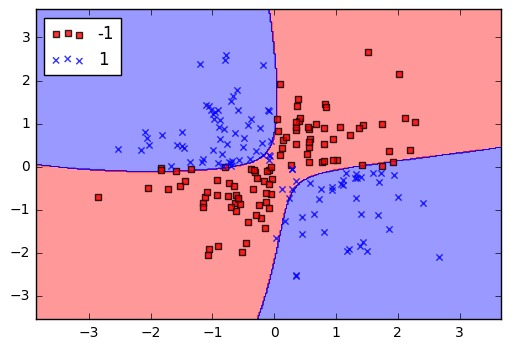

In [49]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show()

- The $\gamma$ parameter, which we set to gamma = 0.1, can be understood as a **cut-off** parameter for the Gaussian Sphere.
- If we increase the value for $\gamma$, we increase the influence or reach of the training samples, which leads to a softer decision boundary

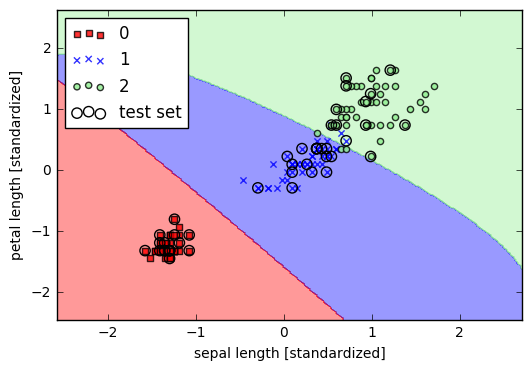

In [50]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm,
                     test_idx=range(105, 150))
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()

- Although the model fits the training dataset very well, such a classifier will likely have a high generalization error on unseen data

## Decision Tree - Classification
- Decision tree breaks down a dataset into smaller and smaller subsets
- The core algorithm for building decision trees is called **ID3** which employs a top-down, greedy search through the space of possible branches with no backtracking.
- ID3 uses **Entropy and Information Gain** to construct a decision tree.

**Entropy**
- ID3 uses entropy to calculate the homogeneity of a sample.
- If the sample is completely homogeneous the entropy is zero
- If the sample is an equally divided it has entropy of one

![alt text](decision.JPG)

**Informatin Gain**
- The information gain is based on the decrease in entropy after a dataset is split on an attribute.
- Constructing a decision tree is all about finding attribute that returns the highest information gain(i.e, the most homogeneous branches)

## Maximizing Information Gain - getting the most bang for the buck

- In order the split the nodes at the most informative features, we need to define an objective function
- The objective function should be optimized via the tree learning algorithm.
$IG(D_{p}, f) = I(D_{p})-\sum_{j=1}^{m}\frac{N_{j}}{N_{p}}(D_{j})$

- **f** is the feature to perform the split
- **$D_{p}$** and **$D_{j}$** are the datasets of the parent and j*th* child node
- **I** is our impurity measure
- **$N_{p}$** is the total number of samples at the parent node
- **$N_{j}$** is the number of samples in the j*th* child node
- The information gain is simply the difference between **The impurity of the parent node** and **the sum of the child node impurities**
- The lower the impurity of the child nodes, the larger the information gain.

#### Binary decision Trees
- Each parent node is split into two child nodes, $D_{left}$ and $D_{right}$: $$IG(D_{p}, a) = I(D_{p})-\frac{N_{left}}{N_{p}}(D_{left})-\frac{N_{right}}{N_{p}}(D_{right})$$
- Three impurities measures or splitting criteria that are commonly used in binary decision trees are:

    - **Gini index($I_{G}$)**
    - **entropy($I_{H}$)**
    - **classification error($I_{E}$)**
    
- Gini index is maximal if the classes are perfectly mixed
- for example, in a binary class setting (c=2):
$$1-\sum_{i=1}^{c}0.5^{2}=0.5$$
- Gini index and entropy yield very similar results
- classification error:
$$I_{E} = 1-max\left \{ p(i\mid t) \right \}$$


In [51]:

def gini(p):
    return (p)*(1-(p)) + (1-p)*(1-(1-p))

def entropy(p):
    return -p*np.log2(p) - (1-p)*np.log2((1-p))

def error(p):
    return 1-np.max([p, 1-p])

In [52]:
x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]

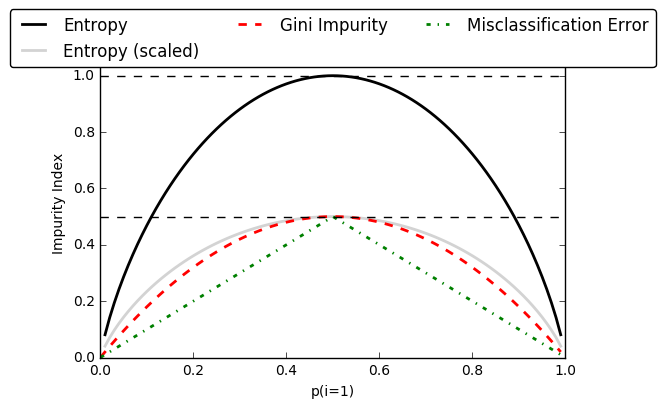

In [53]:
fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err],
                         ['Entropy', 'Entropy (scaled)', 'Gini Impurity',
                         'Misclassification Error'], ['-', '-', '--', '-.'],
                         ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)
    
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
         ncol=3, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

## Building a decision tree
- Using Scikit-learn, we will now train a decision tree with a maximum depth of 3
- Use entropy as a criterion for impurity

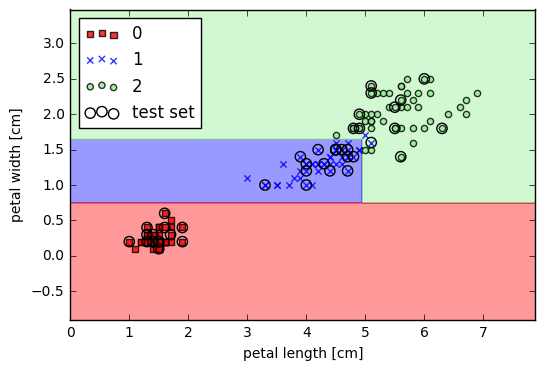

In [54]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3,
                              random_state=0)
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=tree, 
                      test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

In [55]:
from sklearn.tree import export_graphviz

In [56]:
export_graphviz(tree, out_file='tree.dot',
               feature_names=['petal length', 'petal width'])

![alt text](tree.png)

## Random Forests
### Combining weak to strong learners via random forests
- Random forest algorithm can be summarized in four simple steps:
    - Draw a random bootstrap sample of size n ( randomly choose n samples from the training set with replacement)
    - Grow a decision tree from the bootstrap sample. At each node
        - Randomly select d features without replacement.
        - Split the node using the feature that provides the best split according to the objective function, for instance, by maximizing the information gain
        
    - Repeat the steps 1 to 2 k times.
    - Aggregate the prediction by each tree to assign the class label by **majority vote**

In [58]:
from sklearn.ensemble import RandomForestClassifier

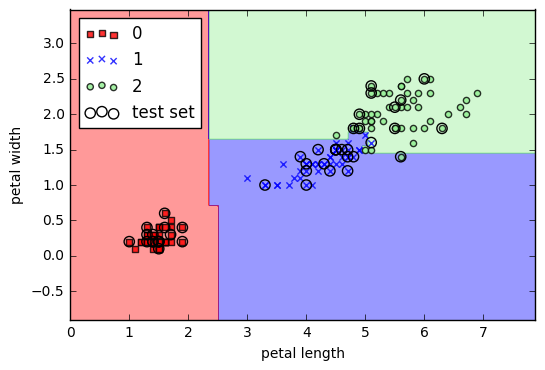

In [60]:
forest = RandomForestClassifier(criterion='entropy', n_estimators=10,
                               random_state=1, n_jobs=2)
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined, classifier=forest,
                     test_idx=range(105, 150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

## K-nearest neighbors
### A lazy learning algorithm
KNN doesn't learn a discriminative function from the training data but memorizes the training dataset instead.
1. Choose the number of k and a distance metric
2. Find the k nearest neighbors of the sample that we want to classify
3. Assign the class label by majority vote

a KNN model in
scikit-learn using an Euclidean distance metric

In [61]:
from sklearn.neighbors import KNeighborsClassifier

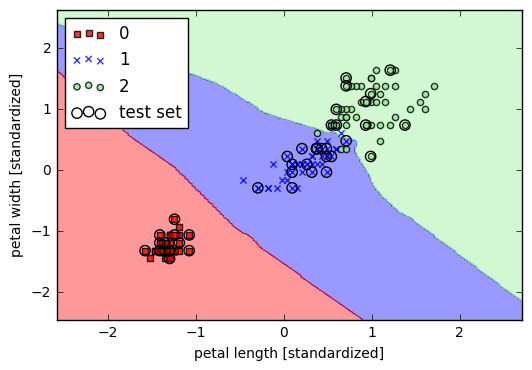

In [63]:
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=knn,
                     test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

## Parametric versus nonparametric models
- Machine Learning algorithms can be grouped into **parametric** and **nonparametric** models.

### Parametric models
- Using parametric models, we estimate parameters from the training dataset to learn a function that can classify new data points without requiring the original training dataset anymore.
- Examples:
    - Perceptron
    - Logistic Regression
    - Linear SVM
    
### NonParametric models
- can't be characterized by a fixed set of parameters
- the number of parameters grows with the training data.
- Examples:
    - Decision tree classifier
    - Random Forest
    - Kernel SVM
    
- KNN belongs to a subcategory of nonparametric models that is described as instance-based learning. Models based on instance-based learning are characterized by memorizing the training dataset, and lazy learning is a special case of instance-based learning that is associated with no (zero) cost during the learning process

## The curse of dimensionality
- KNN is very susceptible to overfitting due to **curse of dimensionality**
- **Curse of dimensionality** describes the phenomenon where the feature space becomes increasingly sparse for an increasing number of dimensions of a fixed-size training dataset.
- In models where regularization is not applicable such as decision trees and KNN, we can use feature selection and dimensionality reduction techniques to help us avoid the curse of dimensionality.